# Линейные методы в машинном обучении

Загрузим необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Линейная регрессия

Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где у - целевая переменная (что мы хотим предсказать), $x_i$ -- признак объекта х, $w_i$ -- вес i-го признака, b -- bias (смещение, свободный член)

Часто предполагают, что объект х содержит в себе фиктивный признак, который всегда равен 1, тогда bias это есть вес этого признака. В этом случае формула принимает простой вид:
$$ y = <w, x>. $$

В матричной форме, в случае, когда у нас есть n объектов формулу можно переписать следующим образом:
$$ Y = Xw,$$
Y -- вектор размера n, X -- матрица объекты-признаки размера $n \times k$, w -- вектор весов размера k.

Решение по методу наименьших квадратов дает 
$$ w = (X^TX)^{-1}X^TY $$

Сгенерируем искусственные данные. 

In [4]:
X = np.linspace(-5, 5, 20)
y = 10 * X - 7

X_train = X[0::2].reshape(-1, 1)
y_train = y[0::2] + np.random.randn(10) * 10

X_test = X[1::2].reshape(-1, 1)
y_test = y[1::2] + np.random.randn(10) * 10

In [11]:
np.random.randn(10) * 10

array([  9.65000754,  16.27502783,  -9.19035268,  -4.49180354,
         6.8551604 , -10.85905377,  23.29113685,  -0.39147673,
        10.42168729, -10.73774329])

Визуализируем данные, используя библиотеку matplotlib.

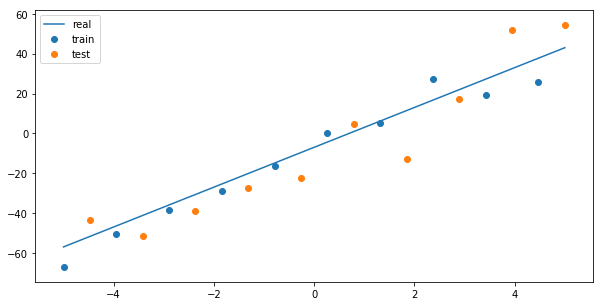

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

Обучим нашу модель на тренировочной выборке и предскажем значения на тесте.
Предсказанные ответы сохраним в переменную $\textbf{predictions}$, а веса модели сохраним в переменные $\textbf{w}$, $b$.

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()

model.fit(X_train, y_train)

w = model.coef_
b = model.intercept_

Визуализируем предсказания.

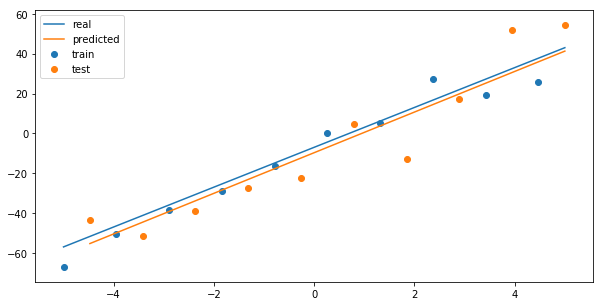

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X[1::2], X[1::2].reshape(-1, 1).dot(w) + b, label='predicted')
plt.legend()
plt.show()

## Оценка результатов

Вычислим среднеквадратичную ошибку на трейне и на тесте. Также вычислим среднюю абсолютную ошибку.

In [10]:
from sklearn.metrics import mean_squared_error

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))

Train MSE:  40.40703773618971
Test MSE:  149.44155412543373


In [12]:
from sklearn.metrics import mean_absolute_error

print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))

Train MAE:  4.737802938096172
Test MAE:  10.39605764756459


# Реальный датасет

Будем работать с датасетом boston. Этот датасет описывает средние цены на недвижимость в районах Бостона в $1000. 
Примеры признаков города: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д.

Загрузим датасет, выведем информацию

In [16]:
from sklearn.datasets import load_boston

In [17]:
house_data = load_boston()

In [18]:
print(house_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [19]:
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']

In [20]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

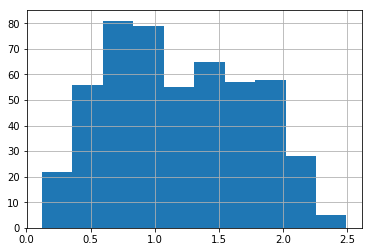

In [24]:
np.log(X['DIS']).hist()

Визуализируем распределения признаков в датасете

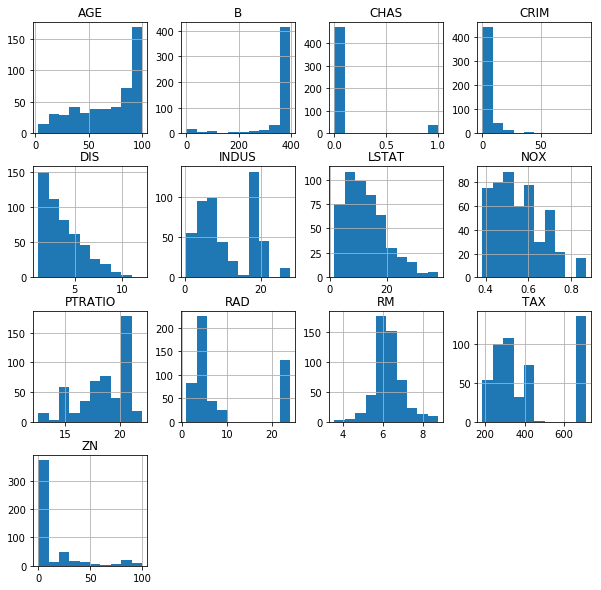

In [21]:
_ = X.hist(X.columns, figsize=(10, 10))

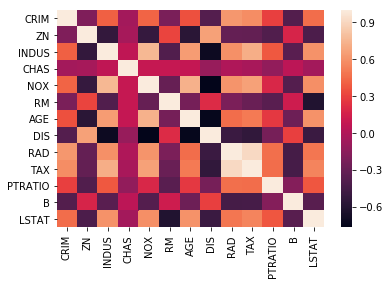

In [22]:
import seaborn as sns

sns.heatmap(X.corr())

In [25]:
X['DIS'] = np.log(X['DIS'])

Сделаем предсказание: какие факторы окажутся наиболее значимыми и в какую сторону?

## Обучение на реальных данных

Разобьём выборку на train и test в соотношении 70/30.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

/home/yury/ml_shad/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Выполним нормировку данных

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Обучим линейную регрессию и подсчитаем её качество на тесте.

In [28]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [29]:
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_e
      rror(y_test, y_test_prediction))

print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_test, y_test_prediction))



Train MSE:  21.10511481854853
Test MSE:  19.39018544351859
Train MAE:  3.3595358313195214
Test MAE:  3.3110186641974715


Визуализируем получившиеся веса

<BarContainer object of 13 artists>

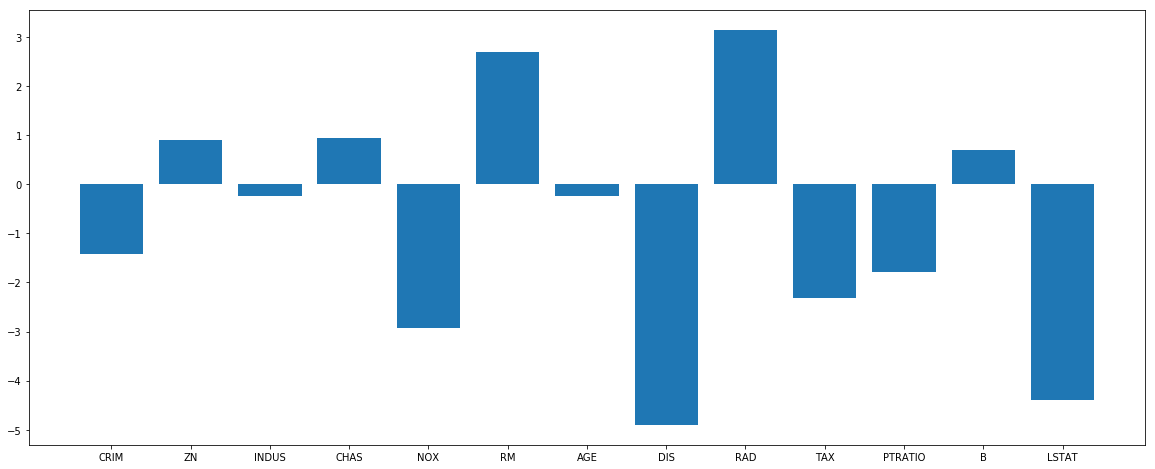

In [31]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_)

Сделайте выводы. Какие факторы оказались самыми значимым? Какие оказались незначимыми? Подтвердились ли ваши догадки?

# Линейные методы классификации

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Создадим два кластера с данными для решения задачи классификации.

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
colors = ("red", "blue")
X, y = make_blobs(n_samples=100, centers=[[-2,0], [2,0]], random_state=20, cluster_std=2)

colored_y = np.zeros(y.size, dtype=str)
for i in range(2):
    colored_y[y == i] = colors[i]
    
plt.scatter(X[:, 0], X[:, 1], c=colored_y)

In [ ]:
x_min, x_max = -12, 12
y_min, y_max = -10, 10
h = 0.05
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

## Обучим логистическую регрессию

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X, y)

Визуализируем предсказания

In [ ]:
plt.figure(figsize=(15,8))

plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

## Реальный датасет

Рассмотрим работу алгоритмов линейной классификации для задачи breast cancer. Датасет содержит в себе данные о пациентках. Целевая переменная --- определить, болеет ли пациентка раком груди.

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
print(data['DESCR'])

In [ ]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

In [ ]:
np.unique(y, return_counts=True)

In [ ]:
X.info()

In [ ]:
X.head()

In [ ]:
sns.heatmap(X.corr())

Первый метод --- логистическая регрессия. Несмотря на название, данный метод применяется именно в задачах классификации. Регрессия служит указанием на то, что мы пытаемся предсказать вероятность принадлежности классу

## Логистическая регрессия

Разбейте выборку на трейн и тест в соотношении 4:1. Обучите модель и предскажите вероятности классов 0 и 1 (это можно сделать с помощью метода $\textbf{predict_proba}$)

In [ ]:
X_train, X_test, y_train, y_test = #Ваш код

In [ ]:
model = LogisticRegression()

#Ваш код

predictions = #Ваш код

In [ ]:
predictions.shape

Подсчитаем accuracy и roc-auc наших предсказаний

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score

In [ ]:
accuracy_score(y_test, predictions[:, 1] > 0.5)

In [ ]:
fpr, tpr, _ = roc_curve(y_test, predictions[:, 1])
auc = roc_auc_score(y_test, predictions[:, 1])

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()

In [ ]:
auc

# Предсказание отклика на маркетинговую кампанию

Возьмем датасет содержащий информацию о клиентах и маркетинговой кампании некоторого банка. Наша задача --- предсказать успешность кампании для каждого клиента. Признаками являются различные характеристики клиента и кампании.

Какие признаки вы бы использовали?

In [13]:
import pandas as pd

http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [14]:
# Считаем данные
data = pd.read_csv('bank-additional-full.csv', sep=';')

In [15]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.info()

In [ ]:
X = data.iloc[:, :-1].copy()
y = data.iloc[:, -1].copy()

# Бинаризуем таргет
from sklearn.preprocessing import LabelBinarizer
y = LabelBinarizer().fit_transform(y).ravel()

Классы очень несбалансированы:

In [ ]:
y.mean()

Заметим, что среди признаков достаточно много категориальных, в то время как линейные модели работают с числовыми признаками.

Одним из способов получить числовые значения категориальных параметров является One-hot encoding. Его суть состоит в том, что для каждого категориального признака $f$ и каждого его значения $v$ создается новый признак, который равен 1 если у объекта значение $f$ равно $v$ и 0 иначе.

One-hot encoding с помощью pandas можно сделать одной строчкой:

In [ ]:
X = pd.get_dummies(X)

# Обратите внимание на признаки
X.info()

Разобьем выборку на трейн и тест

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Обучим линейный SVM с балансировкой классов

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svm = SVC(kernel='linear', class_weight='balanced')
model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)
print('Test accuracy: ', accuracy_score(y_test, y_pred))
print('Test F measure: ', f1_score(y_test, y_pred))

Обучим логистическую регрессию. Из-за несбалансированности классов порог нужно выставлять в зависимости от целей кампании

In [ ]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_predicted = model_logistic.predict_proba(X_test)[:, 1]


Построим график зависимости F-меры от порога положительного класса.

In [ ]:
grid = np.linspace(0, 1, 50)
plt.plot(grid, [f1_score(y_test, y_predicted > item) for item in grid])

In [ ]:
print('Test accuracy: ', accuracy_score(y_test, y_predicted > 0.2))
print('Test F measure: ', f1_score(y_test, y_predicted > 0.2))
print('Test ROC-AUC: ', roc_auc_score(y_test, y_predicted))